In [1]:
import doctest
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
processed_otter = pd.read_csv("processed_data/otters_processed.csv")
processed_urchin = pd.read_csv("processed_data/urchins_processed.csv")
processed_shark = pd.read_csv("processed_data/sharks_processed.csv")
processed_kelp = pd.read_csv("processed_data/kelp_processed.csv")
processed_hotdays = pd.read_csv("processed_data/hotdays_processed.csv")

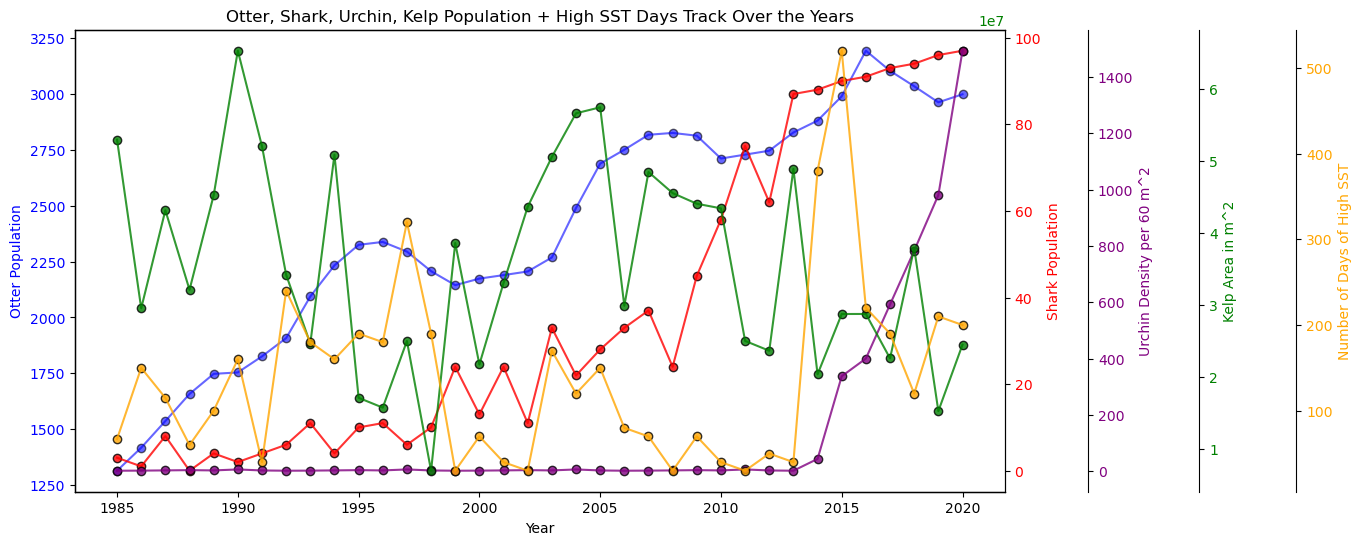

In [3]:
# Create the figure and first axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Otter Population
ax1.scatter(processed_otter["Year"], processed_otter["Total_Pop"], color="blue", alpha=0.6, edgecolors="black", label="Otter Population")
ax1.plot(processed_otter["Year"], processed_otter["Total_Pop"], color="blue", alpha=0.6)  # Connect points
ax1.set_xlabel("Year")
ax1.set_ylabel("Otter Population", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Shark Population
ax2 = ax1.twinx()
ax2.scatter(processed_shark["Year"], processed_shark["Total_Pop"], color="red", alpha=0.8, edgecolors="black", label="Shark Population")
ax2.plot(processed_shark["Year"], processed_shark["Total_Pop"], color="red", alpha=0.8)  # Connect points
ax2.set_ylabel("Shark Population", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Urchin Density
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))
ax3.scatter(processed_urchin["Year"], processed_urchin["Avg_Density"], color="purple", alpha=0.8, edgecolors="black", label="Urchin Density")
ax3.plot(processed_urchin["Year"], processed_urchin["Avg_Density"], color="purple", alpha=0.8)  # Connect points
ax3.set_ylabel("Urchin Density per 60 m^2", color="purple")
ax3.tick_params(axis="y", labelcolor="purple")

# Kelp Area
ax4 = ax1.twinx()
ax4.spines["right"].set_position(("outward", 140))
ax4.scatter(processed_kelp["Year"], processed_kelp["Total_Area"], color="green", alpha=0.8, edgecolors="black", label="Kelp Area")
ax4.plot(processed_kelp["Year"], processed_kelp["Total_Area"], color="green", alpha=0.8)  # Connect points
ax4.set_ylabel("Kelp Area in m^2", color="green")
ax4.tick_params(axis="y", labelcolor="green")

# High SST Days
ax5 = ax1.twinx()
ax5.spines["right"].set_position(("outward", 210))
ax5.scatter(processed_hotdays["Year"], processed_hotdays["Hot_Days"], color="orange", alpha=0.8, edgecolors="black", label="High SST Days")
ax5.plot(processed_hotdays["Year"], processed_hotdays["Hot_Days"], color="orange", alpha=0.8)  # Connect points
ax5.set_ylabel("Number of Days of High SST", color="orange")
ax5.tick_params(axis="y", labelcolor="orange")

# Title
plt.title("Otter, Shark, Urchin, Kelp Population + High SST Days Track Over the Years")

# Show the plot
plt.show()

# Solving for constants

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# Given initial conditions
U0, R0, S0 = 3, 1300, 3
initial_conditions = [U0, R0, S0]

# Define the system of ODEs
def model(t, y, params):
    U, R, S = y
    a, f, b, c, d, k, e = params
    dU_dt = a * U - f * U * R
    dR_dt = b * R + c * U * R - d * S * R
    dS_dt = k * S + e * S * R
    return [dU_dt, dR_dt, dS_dt]

# Simulate the model
def simulate(params, t_eval):
    solution = solve_ivp(model, [t_eval[0], t_eval[-1]], initial_conditions, t_eval=t_eval, args=(params,))
    return solution.y  # Returns array of U, R, S over time

# Load real data (replace with actual data)
# Assume real_data is a dictionary containing observed U, R, and S values at specific time points
real_data = {
    "time": np.linspace(1985, 2020, 36),  # Example time points
    "U": processed_urchin["Avg_Density"],  # Replace with actual data
    "R": processed_otter["Total_Pop"],  # Replace with actual data
    "S": processed_shark["Total_Pop"]  # Replace with actual data
}

# Define the loss function (mean squared error)
def loss(params):
    t_eval = real_data["time"]
    simulated = simulate(params, t_eval)
    U_sim, R_sim, S_sim = simulated
    error = (
        np.mean((U_sim - real_data["U"])**2) +
        np.mean((R_sim - real_data["R"])**2) +
        np.mean((S_sim - real_data["S"])**2)
    )
    return error



In [ ]:
from scipy.optimize import least_squares

initial_params = np.random.uniform(0, 1, 7)  # Random initial values between 0 and 1
bounds = (np.zeros(7), np.ones(7))  # Lower and upper bounds for all parameters

result = least_squares(
    loss, 
    initial_params, 
    bounds=bounds, 
    method='dogbox', 
    ftol=10,  # Stop earlier if function value changes < 0.1
    xtol=10,  # Stop earlier if parameters change < 0.1
    gtol=10,   # Stop earlier if gradient norm is small
    max_nfev=1
)

# Importing Temp Data

In [18]:
import xarray as xr

# Open the NetCDF file
ds = xr.open_dataset('oisst-avhrr-v02r01.20250301_preliminary.nc')

# Check the dataset structure
print(ds)

<xarray.Dataset>
Dimensions:  (time: 1, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2025-03-01T12:00:00
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, zlev, lat, lon) float32 ...
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
Attributes: (12/37)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20250301_preliminary.nc
    naming_authority:           gov.noaa.ncei
    ...                         .

In [20]:
# Example: Extract sea surface temperature at a specific lat/lon and time
lat = 36.6   # Central California latitude
lon = -122.0  # Central California longitude

# Find the nearest point in the dataset
sst = ds['sst'].sel(lat=lat, lon=lon, method='nearest')
print(sst)

<xarray.DataArray 'sst' (time: 1, zlev: 1)>
[1 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2025-03-01T12:00:00
  * zlev     (zlev) float32 0.0
    lat      float32 36.62
    lon      float32 0.125
Attributes:
    long_name:  Daily sea surface temperature
    units:      Celsius
    valid_min:  -300
    valid_max:  4500


In [23]:
sst_df = ds['sst'].to_dataframe().reset_index()
sst_df = sst_df.dropna(subset=['sst'])
print(sst_df)

                       time  zlev     lat      lon   sst
66903   2025-03-01 12:00:00   0.0 -78.375  165.875 -1.41
66904   2025-03-01 12:00:00   0.0 -78.375  166.125 -1.41
66905   2025-03-01 12:00:00   0.0 -78.375  166.375 -1.42
66906   2025-03-01 12:00:00   0.0 -78.375  166.625 -1.44
66907   2025-03-01 12:00:00   0.0 -78.375  166.875 -1.46
...                     ...   ...     ...      ...   ...
1036795 2025-03-01 12:00:00   0.0  89.875  358.875 -1.50
1036796 2025-03-01 12:00:00   0.0  89.875  359.125 -1.46
1036797 2025-03-01 12:00:00   0.0  89.875  359.375 -1.80
1036798 2025-03-01 12:00:00   0.0  89.875  359.625 -1.80
1036799 2025-03-01 12:00:00   0.0  89.875  359.875 -1.80

[691150 rows x 5 columns]
